### Modeling using MNIST

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28)

In [6]:
X_train_flat[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [7]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics =['accuracy']
)

In [8]:
model.fit(X_train_flat, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 859us/step - loss: 9.3646 - accuracy: 0.8443
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 6.1787 - accuracy: 0.8780
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.7838 - accuracy: 0.8830
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.6563 - accuracy: 0.8850: 0s - los
Epoch 5/5
1875/1875 [==============================] - 2s 934us/step - loss: 5.5092 - accuracy: 0.8868


In [9]:
#after scaling

X_train2 = X_train/255
X_test2 = X_test/255

X_train2_flat = X_train2.reshape(len(X_train2), 28*28)
X_test2_flat = X_test2.reshape(len(X_test2), 28*28)

In [10]:
model.fit(X_train2_flat, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2882 - accuracy: 0.8064
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8959 - accuracy: 0.8727
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6185 - accuracy: 0.8850
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4520 - accuracy: 0.8963
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3601 - accuracy: 0.9065


In [11]:
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 0s 678us/step - loss: 45.7509 - accuracy: 0.8825


[45.75093460083008, 0.8824999928474426]

In [12]:
model.evaluate(X_test2_flat, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3205 - accuracy: 0.9135


[0.3204708397388458, 0.9135000109672546]

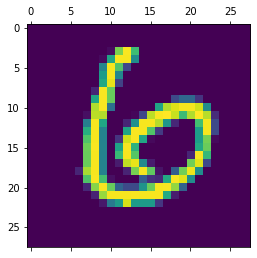

In [13]:
plt.matshow(X_test[11])

In [14]:
y_pred = model.predict(X_test2_flat)

In [15]:
np.argmax(y_pred[11])

6

In [16]:
y_pred_lab = [np.argmax(i) for i in y_pred]

In [17]:
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_pred_lab )
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    1,    0,    3,    7,    1,    2,    0],
       [   0, 1111,    2,    2,    0,    3,    4,    0,   13,    0],
       [  11,   12,  886,   24,   15,    0,   13,   23,   44,    4],
       [   3,    2,   16,  917,    1,   25,    4,   16,   18,    8],
       [   2,    2,    3,    1,  900,    1,   13,    2,   10,   48],
       [  12,    7,    1,   35,   13,  765,   16,   10,   24,    9],
       [  14,    3,    5,    1,    6,   16,  908,    2,    3,    0],
       [   2,   15,   22,    4,    8,    0,    1,  938,    3,   35],
       [  11,   10,    7,   24,    9,   25,   11,   14,  852,   11],
       [  11,    8,    2,   13,   35,    8,    0,   31,    8,  893]])>

Text(69.0, 0.5, 'Truth')

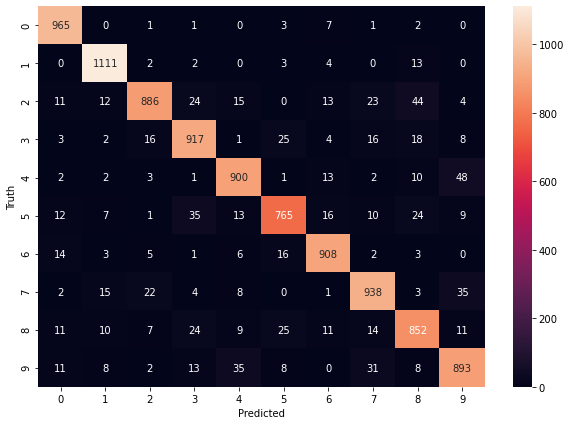

In [18]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [19]:
# model 2

model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics =['accuracy']
)

In [20]:
model2.fit(X_train2_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3199 - accuracy: 0.9073
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1304 - accuracy: 0.9617
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0932 - accuracy: 0.9720
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0716 - accuracy: 0.9783
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0570 - accuracy: 0.9829


In [21]:
model2.evaluate(X_test2_flat, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0965 - accuracy: 0.9721


[0.09653522074222565, 0.972100019454956]

In [22]:
# model 3

model3 = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(90, activation = 'relu'),
    keras.layers.Dense(70, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model3.compile(
    optimizer = 'adam',
    loss = 'Hinge',
    metrics =['accuracy']
)

In [23]:
model3.fit(X_train2_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0992 - accuracy: 0.1040
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0987 - accuracy: 0.0966
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0987 - accuracy: 0.0966
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0987 - accuracy: 0.0972
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0987 - accuracy: 0.0976


In [24]:
model3.evaluate(X_test2_flat, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0980 - accuracy: 0.0958


[0.09799999743700027, 0.0957999974489212]

In [25]:
# model 4

model4 = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model4.compile(
    optimizer = 'adam',
    loss = 'Huber',
    metrics =['accuracy']
)

In [26]:
model4.fit(X_train2_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 3.2116 - accuracy: 0.1009
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 3.2076 - accuracy: 0.0987
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 3.2076 - accuracy: 0.0987
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 3.2076 - accuracy: 0.0987
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 3.2076 - accuracy: 0.0987


In [27]:
model4.evaluate(X_test2_flat, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 3.1962 - accuracy: 0.0980


[3.196150064468384, 0.09799999743700027]

##### The maximum accuracy was with Loss Function sparse_categorical_crossentropy, and one hidden layer!